# Introduction

## Libary Import

In [1]:
 ''' Libary Import ''' 
import pandas as pd
import numpy as np
 
#Data Visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo 

pd.options.mode.chained_assignment = None  # default='warn'
 
#General Plotting Setting
plt.rcParams.update({'font.size': 11,'figure.figsize': (16,9)})

# Main Section

## Task 1

#### Importing Data

In [2]:
# Importing Data
netflix = pd.read_csv('netflix.csv')

#### Dataframe shape

In [3]:
# Outputting shape of dataset
print(f'Netflix dataset, consist of {len(netflix.columns)} columns and {len(netflix)} rows')

Netflix dataset, consist of 12 columns and 8807 rows


#### Dataframe columns

In [4]:
test = ["1", "2", "3", "4"]

In [5]:
print(f'The dataframe consist of the following columns:\n {netflix.columns.to_list()}')

The dataframe consist of the following columns:
 ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


#### Sum of non null values + data types across dataframe

In [6]:
# Sum of non-nan values in columns and data type
print(f'Dataframe datatype:  \n{netflix.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
Dataframe datatype:  
None


#### Visualising most popular release year

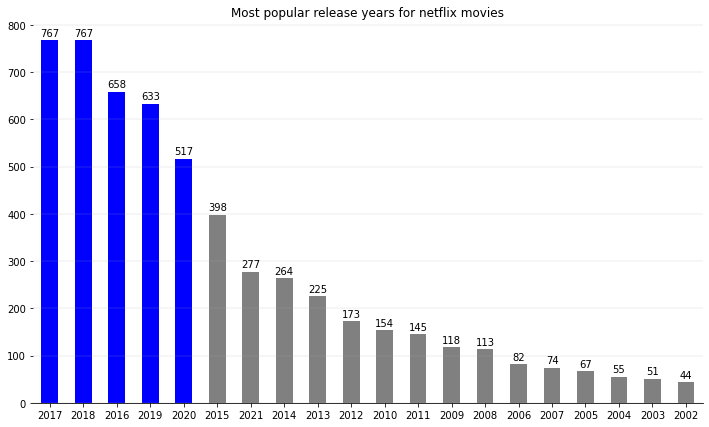

In [7]:
fix, axs = plt.subplots(figsize=(12,7))

# Adding annotations
graph_1 = (netflix[netflix.type == 'Movie']
           .release_year
           .value_counts()
           .head(20)
                .plot(kind='bar', color=['blue' if value > 400 else "grey" for value in netflix[netflix.type == 'Movie']
                .release_year
                .value_counts()]))

for p in graph_1.patches:
        graph_1.annotate('{:,.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+5),
                    ha='center', va='bottom',
                    color= 'black')
        

# Removing chart border and adding grid lines for easier visual interpretation
sns.despine(bottom = False, left = True)
axs.yaxis.grid(True, linewidth=0.2) 

#Rotation xticks to horizontal
axs.set_xticklabels(labels=netflix[netflix.type == 'Movie'].release_year.value_counts().head(20).keys(), rotation=0)

plt.title(f"Most popular release years for netflix movies")
plt.show()


#### Distribution of movies and TV shows in dataframe

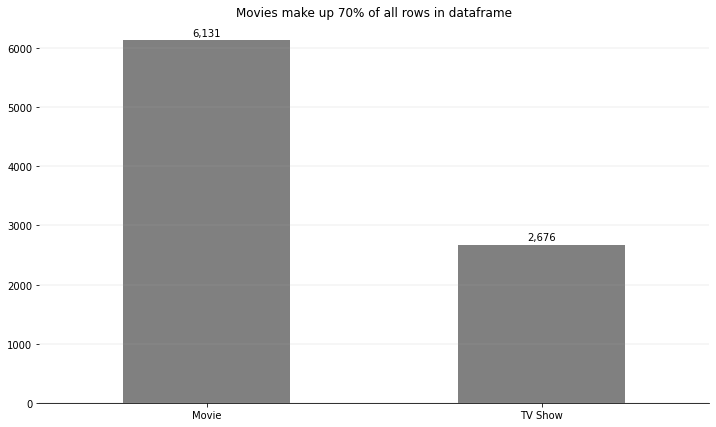

In [8]:
fix, axs = plt.subplots(figsize=(12,7))
graph = netflix.type.value_counts().plot(kind='bar', color = "grey", ax=axs)

#Adding annotations
for p in graph.patches:
        graph.annotate('{:,.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+45),
                    ha='center', va='bottom',
                    color= 'black')
        

# Removing chart border and adding grid lines for easier visual interpretation
sns.despine(bottom = False, left = True)
axs.yaxis.grid(True, linewidth=0.2) 

#Rotation xticks to horizontal
axs.set_xticklabels(labels=netflix.type.unique(), rotation=0)

plt.title(f"Movies make up {len(netflix[netflix.type == 'Movie'])/len(netflix):.0%} of all rows in dataframe")
plt.show()

## Task 2

#### Count of movies in dataframe

In [9]:
# This question have more or less already been answered through the visualization above
print(f"The total number of movies in dataframe is {len(netflix[netflix.type == 'Movie'])} ")

The total number of movies in dataframe is 6131 


## Task 3

To add a continent column to the dataframe, the easiest and simplest way would be to use ***pd.merge*** between the netflix dataframe and an external continent dataframe, however, this would produce a lot of null values for those records in which there are multiple countries in one cell, as you can not merge strings on lists. One way to combat this, would be using index 0 for all elements in each country cell, so that we just always used the first notated country. This would be an easy solve for the previously mentioned issue, however, that would mean that alot of continents will not be accounted for. 

Therefore, to overcome these issues, we have transformed each cell in the ```country``` column into a list, containing all the notated countries as a individual element each (For Nulls, these list will just be ```['nan']```). Next we transform the continent dataframe into a dictionary, with countries as keys and continent as values. We then loop through each element of each list in the ```country_list``` column, to find the corresponding value in the continent dictionary, and then outputs those to a string sequence. E.g.

Country Cell:\
```United States, Germany, Italy```

Country List Cell (formatted country cell) \
```['United States', 'Germany', 'Italy']```

Continent Output:\
``` ['Americas', 'Europe'] ``` &rarr; ```Americas, Europe```



In [10]:
# Importing continent dataframe
continent = pd.read_csv('countryContinent.csv').rename(columns={'name':'country', 'region':'continent'})

#Replacing Palestine value, as it caused some issues later
continent = continent.replace({'Palestine, State of':'Palestine'})

# Transforming to dict
continent = continent.set_index('country').to_dict()['continent']

# Adding two keys and their correpsonding values to dictionary, as they exists in netflix dataframe.add()
continent['Soviet Union'] = 'Europe'
continent['Vatican City'] = 'Europe'

In [11]:
# Replacing directions from Germany, and instead making it into one (Specifying Germany to not overwrite e.g. South Africa)
netflix['country'] = (netflix.country.str.replace('|'.join(['West Germany', 'East Germany', 'North Germany', 'South Germany']),'Germany', regex=True))

In [12]:
#Transforming countries to list
netflix['country_list'] = netflix.country.apply(lambda x: list(str(x).split(',')))

# There were a few instances of empty strings in lists, so to combat errors we removed them
netflix['country_list'] = [list(filter(None, sublist)) for sublist in netflix.country_list]

# Adding continent column to all non-null rows and dropping country_list column
netflix = netflix.assign(
    continent = lambda x: x.loc[netflix.country.notna()].country_list.map(lambda x: str(set([continent[v.strip()] for v in x]))[1:-1].replace("'",''))
).drop(columns='country_list')

#### Output - first 10 continent rows

In [13]:
# Notice index 7, where multiple continents are listed
netflix[:10].continent

0                    Americas
1                      Africa
2                         NaN
3                         NaN
4                        Asia
5                         NaN
6                         NaN
7    Africa, Americas, Europe
8                      Europe
9                    Americas
Name: continent, dtype: object

## Task 4

#### Importing Data

In [14]:
    imdb_movies = pd.read_excel('IMDB_datasets/imdb_movies.xlsx')
    imdb_votes = pd.read_excel(r'IMDB_datasets/imdb_votes.xlsx')

#### Exploring both dataframes and joining them

In [15]:
imdb_votes.head()

,imdb_title_id,avg_vote
0,tt0000009,5.9
1,tt0000574,6.1
2,tt0001892,5.8
3,tt0002101,5.2
4,tt0002130,7.0


In [16]:
imdb_movies.head()

,imdb_title_id,title,director
0,tt0000009,Miss Jerry,Alexander Black
1,tt0000574,The Story of the Kelly Gang,Charles Tait
2,tt0001892,Den sorte drøm,Urban Gad
3,tt0002101,Cleopatra,Charles L. Gaskill
4,tt0002130,L'Inferno,"""Francesco Bertolini, Adolfo Padovan"""


In [17]:
# Merging based on title_id
imdb = imdb_movies.merge(imdb_votes, on='imdb_title_id', how='left')

**Checking for duplicates**

In [18]:
#Checking for uniqueness in each column
imdb.nunique()

imdb_title_id    85854
title            82093
director         34733
avg_vote            89
dtype: int64

In [19]:
# Checking for duplicates in title and director
print(f'There are {imdb[["title","director"]].duplicated().sum()} duplicates between the title and director columns')

There are 31 duplicates between the title and director columns


In [20]:
#Printing Duplicates To Explore Further 
imdb[imdb[['title','director']].duplicated(keep='last')].sort_values(by='title').head()

,imdb_title_id,title,director,avg_vote
19458,tt0080880,A tutto gas,Les Rose,5.1
39645,tt0275942,Anno Domini 681,Ludmil Staikov,8.7
42626,tt0338769,Beauty and the Beast,David Lister,4.1
59689,tt1585558,Bodyguard,Siddique,6.7
3502,tt0032290,Buck Rogers,"""Ford Beebe, Saul A. Goodkind""",6.9


To remove duplicates, we've decided to group based on the ```director``` and ```title``` column and then aggregating ```avg_vote``` to be the average of those two values, and ```imdb_title_id``` to be the first in the record (this is for no specific reason, just to have one of the ```title_id```'s).

Alternatively, would have been to filter based on higest ```avg_vote```, achieved by sorting values on ```avg_vote``` and keep last of duplicates, or vice versa - which would also have been a consistent way of filtering.

In [21]:
#imdb = imdb.sort_values('avg_vote').drop_duplicates(subset=['title','director'], keep='last')
imdb = (imdb
        .groupby(['title', 'director'])
        .agg(imdb_title_id=('imdb_title_id', 'first'), 
             avg_vote=('avg_vote', lambda x: sum(x)/len(x)))
        .reset_index())

## Task 5

#### Netflix Table

First we've decided to remove all TV Show rows from the netflix table, because only movies are included in the IMDB datasets

In [22]:
netflix_movies = netflix[netflix.type == 'Movie']

Because we can't very accurately from our data determine directors to fill the null values we've decided to remove rows with null director value.

(We did try and merge based on title, but because many movies share the same title, this created lots of duplicate rows, with different directors for each)

In [23]:
netflix_movies = netflix_movies.dropna(subset=['director'])

Lastly, we transform the director and title columns into strings

In [24]:
netflix_movies[['director','title']] = netflix_movies[['director', 'title']].astype('string')

#### IMDB Table

Removing quotation marks from director and title columns + removing leading and trailing single quotations, that could hinder merging

In [25]:
imdb = imdb.assign(
    director = lambda x: x.director.apply(lambda x: x.replace('"', '')),
    title = lambda x: x.title.apply(lambda x: x.replace('"', '').strip("'"))
)

#### Merging

In [26]:
netflix_movies_imdb = netflix_movies.merge(imdb, on=['director','title'], how='left')

In [27]:
netflix_movies_imdb.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,continent,imdb_title_id,avg_vote
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Americas,NaN,NaN
1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,NaN,NaN,NaN
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...","Africa, Americas, Europe",tt0108041,6.9
3,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,Americas,NaN,NaN
4,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,Europe,NaN,NaN


## Task 6

In order to find all movies that appear in both, we can remove all null values, as any row in the netflix movies table, that does not match any rows in the IMDB table, will produce a null value.

In [28]:
netflix_movies_imdb = netflix_movies_imdb[netflix_movies_imdb.imdb_title_id.notna()]

In [29]:
netflix_movies_imdb.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,continent,imdb_title_id,avg_vote
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...","Africa, Americas, Europe",tt0108041,6.9
10,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,Asia,tt0151121,6.5
25,s49,Movie,Training Day,Antoine Fuqua,"Denzel Washington, Ethan Hawke, Scott Glenn, T...",United States,"September 16, 2021",2001,R,122 min,"Dramas, Thrillers",A rookie cop with one day to prove himself to ...,Americas,tt0139654,7.7
41,s74,Movie,King of Boys,Kemi Adetiba,"Sola Sobowale, Adesua Etomi, Remilekun ""Remini...",Nigeria,"September 14, 2021",2018,TV-MA,182 min,"Dramas, International Movies",When a powerful businesswoman’s political ambi...,Africa,tt8329618,5.8
51,s91,Movie,Paradise Hills,Alice Waddington,"Emma Roberts, Danielle Macdonald, Awkwafina, E...","Spain, United States","September 9, 2021",2019,TV-MA,95 min,"Sci-Fi & Fantasy, Thrillers",Uma wakes up in a lush tropical facility desig...,"Americas, Europe",tt6127004,5.6


## Task 7

Finding top 10 comedies, by finding all rows that contain Comedies in ```listed_id``` column and then sorting based on ``avg_vote``

In [30]:
netflix_comedies = netflix_movies_imdb[netflix_movies_imdb.listed_in.str.contains('Comedies')]
top_10 = netflix_comedies.sort_values(by='avg_vote', ascending=False).head(10)

### Subtask a.

In [31]:
print(f'These are the release years of the top 10: \n{top_10.release_year.value_counts()}')

These are the release years of the top 10: 
2019    2
1979    1
2009    1
2017    1
2018    1
1975    1
1994    1
2014    1
2001    1
Name: release_year, dtype: int64


### Subtask b.

In [32]:
print(f'Movies continent: \n{top_10.continent.value_counts()}')

Movies continent: 
Asia    10
Name: continent, dtype: int64


## Task 8